In [1]:
!pip install sparse_lmm


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
import numpy as np

clinical_data = pd.read_csv(r'C:\Users\张宇强\Desktop\TCGA.LIHC.sampleMap_LIHC_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv(r'C:\Users\张宇强\Desktop\HiSeqV2_PANCAN', sep='\t', index_col=0)

In [17]:
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,adjacent_hepatic_tissue_inflammation_extent_type,age_at_initial_pathologic_diagnosis,albumin_result_lower_limit,...,_GENOMIC_ID_TCGA_LIHC_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_LIHC_mutation_bcgsc_gene,_GENOMIC_ID_data/public/TCGA/LIHC/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_LIHC_PDMRNAseqCNV,_GENOMIC_ID_TCGA_LIHC_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_LIHC_mutation_ucsc_maf_gene,_GENOMIC_ID_TCGA_LIHC_exp_HiSeqV2,_GENOMIC_ID_TCGA_LIHC_exp_HiSeqV2_PANCAN,_GENOMIC_ID_TCGA_LIHC_mutation_broad_gene,_GENOMIC_ID_TCGA_LIHC_hMethyl450
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01,TCGA-2V-A95S-01,TCGA-2V-A95S,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,Severe,NaN,3.5,...,53796be6-1c87-448a-9928-3c640e9d3414,NaN,TCGA-2V-A95S-01,TCGA-2V-A95S-01,53796be6-1c87-448a-9928-3c640e9d3414,NaN,53796be6-1c87-448a-9928-3c640e9d3414,53796be6-1c87-448a-9928-3c640e9d3414,NaN,TCGA-2V-A95S-01A-11D-A36Y-05
TCGA-2Y-A9GS-01,TCGA-2Y-A9GS-01,TCGA-2Y-A9GS,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,58.0,3.5,...,7b0d0cd1-3770-4e1c-9a64-93e41825a3b7,NaN,TCGA-2Y-A9GS-01,TCGA-2Y-A9GS-01,7b0d0cd1-3770-4e1c-9a64-93e41825a3b7,NaN,7b0d0cd1-3770-4e1c-9a64-93e41825a3b7,7b0d0cd1-3770-4e1c-9a64-93e41825a3b7,NaN,TCGA-2Y-A9GS-01A-12D-A383-05
TCGA-2Y-A9GT-01,TCGA-2Y-A9GT-01,TCGA-2Y-A9GT,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,51.0,3.5,...,e1ab65b5-ee17-4e86-93aa-446c8f387ef1,NaN,TCGA-2Y-A9GT-01,TCGA-2Y-A9GT-01,e1ab65b5-ee17-4e86-93aa-446c8f387ef1,NaN,e1ab65b5-ee17-4e86-93aa-446c8f387ef1,e1ab65b5-ee17-4e86-93aa-446c8f387ef1,NaN,TCGA-2Y-A9GT-01A-11D-A383-05
TCGA-2Y-A9GU-01,TCGA-2Y-A9GU-01,TCGA-2Y-A9GU,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,55.0,3.5,...,6f3f7f73-b031-424e-ba7c-263f802dd6cf,NaN,TCGA-2Y-A9GU-01,TCGA-2Y-A9GU-01,6f3f7f73-b031-424e-ba7c-263f802dd6cf,NaN,6f3f7f73-b031-424e-ba7c-263f802dd6cf,6f3f7f73-b031-424e-ba7c-263f802dd6cf,NaN,TCGA-2Y-A9GU-01A-11D-A383-05
TCGA-2Y-A9GV-01,TCGA-2Y-A9GV-01,TCGA-2Y-A9GV,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,NaN,54.0,3.5,...,c0bcdbc7-9bed-49b7-93ca-f82ffc2929a1,NaN,TCGA-2Y-A9GV-01,TCGA-2Y-A9GV-01,c0bcdbc7-9bed-49b7-93ca-f82ffc2929a1,NaN,c0bcdbc7-9bed-49b7-93ca-f82ffc2929a1,c0bcdbc7-9bed-49b7-93ca-f82ffc2929a1,NaN,TCGA-2Y-A9GV-01A-11D-A383-05


In [18]:
gene_data.head()

,TCGA-FV-A495-01,TCGA-G3-A3CH-11,TCGA-CC-A3MB-01,TCGA-BC-A3KF-01,TCGA-DD-A4NV-01,TCGA-CC-A1HT-01,TCGA-BD-A3EP-01,TCGA-FV-A3R2-11,TCGA-CC-A3MA-01,TCGA-ZP-A9CV-01,...,TCGA-UB-A7ME-01,TCGA-DD-A4NR-01,TCGA-G3-A25U-01,TCGA-DD-AAE6-01,TCGA-G3-AAV2-01,TCGA-BC-A10Z-11,TCGA-ZP-A9CY-01,TCGA-DD-A39Y-01,TCGA-DD-A115-01,TCGA-FV-A3I0-11
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,1.317808,1.154608,1.379008,1.297208,2.152708,0.630408,1.704608,1.623908,-0.181992,2.131908,...,2.054208,2.233208,2.631908,2.681008,0.450608,1.612908,1.976308,1.730308,1.894908,1.661008
HIF3A,-0.306526,-0.170026,-1.553426,-2.617326,-0.769026,1.332674,-1.645126,-0.266926,-2.699826,-0.332026,...,-2.335226,-2.547826,-0.016726,-2.982226,-0.632926,-2.351726,-1.031826,-5.554726,-1.795626,-1.608526
RNF17,3.664565,-0.531035,-0.531035,-0.531035,-0.531035,3.990065,6.344665,-0.531035,-0.531035,-0.531035,...,0.141565,6.296965,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,-0.272872,-0.108572,0.301528,0.815528,-0.315972,0.076128,0.224028,-0.039372,-0.830372,0.447428,...,-0.101772,0.100028,-0.631672,0.693828,0.084428,0.026428,-0.024972,0.363228,0.313828,0.041328
RNF11,-1.368378,0.430122,-1.143078,-1.021978,-0.131078,-0.153778,-0.531678,-0.151678,-0.022478,-0.084578,...,-0.511478,-0.935778,-0.172778,-1.028278,-0.365578,0.075122,-0.097878,-0.338378,0.609522,0.292622


In [19]:
gene_fullname = 'BRCA gene'
gene = 'brca'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Liver Cancer'

col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')
gene_data.T

The clinical dataset has 109 features, and the gene dataset includes 20530 genes


sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-FV-A495-01,1.317808,-0.306526,3.664565,-0.272872,-1.368378,-0.86461,-0.687594,1.420854,-0.423399,3.441328,...,-0.748878,-0.749217,1.692567,0.46801,-1.182977,0.483014,0.571073,2.371905,3.207167,0.294088
TCGA-G3-A3CH-11,1.154608,-0.170026,-0.531035,-0.108572,0.430122,0.33459,-0.944194,-0.721846,1.048001,2.607128,...,-0.748878,1.953683,1.055567,-1.28139,-1.720777,-1.362686,-0.090527,1.872705,1.521067,0.220688
TCGA-CC-A3MB-01,1.379008,-1.553426,-0.531035,0.301528,-1.143078,0.07049,-0.370094,-0.704446,-0.423399,2.672228,...,-0.278978,0.571483,-1.291233,-1.28139,-0.377377,-2.333686,1.041773,1.849705,-2.538233,0.872188
TCGA-BC-A3KF-01,1.297208,-2.617326,-0.531035,0.815528,-1.021978,0.02759,0.011506,-2.518246,-0.423399,4.996628,...,-0.271878,-0.752417,-0.893333,-0.80439,-0.589777,-1.547186,0.865673,2.426305,-1.005833,3.175588
TCGA-DD-A4NV-01,2.152708,-0.769026,-0.531035,-0.315972,-0.131078,-0.34751,0.454106,-0.401346,-0.423399,3.723328,...,-0.748878,1.953083,-0.712633,-1.28139,-1.234477,-0.487286,0.732173,2.686105,1.770167,0.911188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-BC-A10Z-11,1.612908,-2.351726,-0.531035,0.026428,0.075122,0.22919,-0.975394,-1.624846,-0.423399,2.191428,...,-0.748878,2.106683,-0.699933,-1.28139,-1.312677,-0.796286,-0.580027,1.482005,0.838067,0.448388
TCGA-ZP-A9CY-01,1.976308,-1.031826,-0.531035,-0.024972,-0.097878,0.05819,-0.309394,-0.148746,-0.423399,3.175728,...,-0.748878,0.352983,0.092067,-1.28139,-1.155177,-0.684686,0.480373,2.046505,1.122767,0.113288
TCGA-DD-A39Y-01,1.730308,-5.554726,-0.531035,0.363228,-0.338378,-0.73671,-0.474794,-2.071446,-0.423399,3.848328,...,-0.748878,-0.667417,-0.274033,4.18611,-2.502577,-2.770286,-1.351627,1.367805,-1.820933,0.128488
TCGA-DD-A115-01,1.894908,-1.795626,-0.531035,0.313828,0.609522,-0.32011,-0.413994,0.045454,-0.423399,5.754328,...,2.113022,1.274783,-0.348833,-1.28139,-1.634877,-0.633786,0.602773,2.245405,0.959267,-0.261012


In [20]:
merged_data = clinical_data.join(gene_data.T)

merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,adjacent_hepatic_tissue_inflammation_extent_type,age_at_initial_pathologic_diagnosis,albumin_result_lower_limit,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01,TCGA-2V-A95S-01,TCGA-2V-A95S,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,Severe,NaN,3.5,...,-0.748878,-0.383517,1.454767,-1.28139,-2.248977,-1.906786,-0.351027,0.957505,-0.322433,1.048088
TCGA-2Y-A9GS-01,TCGA-2Y-A9GS-01,TCGA-2Y-A9GS,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,58.0,3.5,...,-0.748878,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388
TCGA-2Y-A9GT-01,TCGA-2Y-A9GT-01,TCGA-2Y-A9GT,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,51.0,3.5,...,-0.748878,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188
TCGA-2Y-A9GU-01,TCGA-2Y-A9GU-01,TCGA-2Y-A9GU,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,55.0,3.5,...,-0.748878,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088
TCGA-2Y-A9GV-01,TCGA-2Y-A9GV-01,TCGA-2Y-A9GV,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,NaN,54.0,3.5,...,-0.748878,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688


In [22]:
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()


,days_to_birth,FBXL13,FBXL12,FBXL15,CYP27B1,FBXL17,FBXL16,FAM169A,FAM116B,FAM116A,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2Y-A9GS-01,-21318.0,-0.473756,-0.286507,0.174327,-2.77279,-0.238871,1.092932,1.841549,-1.268532,0.08401,...,-0.748878,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388
TCGA-2Y-A9GT-01,-18768.0,-0.589756,-0.219807,0.862227,0.29661,-0.026671,-3.335868,-0.343451,-0.979732,-0.51359,...,-0.748878,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188
TCGA-2Y-A9GU-01,-20187.0,-0.677256,0.265093,0.943527,-2.51589,0.186229,-1.267168,-3.087451,-0.671932,-1.76649,...,-0.748878,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088
TCGA-2Y-A9GV-01,-20011.0,-3.263356,-0.367907,0.520527,-1.87089,0.105729,-2.581268,0.808649,-1.104032,-0.96539,...,-0.748878,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688
TCGA-2Y-A9GW-01,-23587.0,-3.263356,0.017593,0.983427,2.54091,0.362329,-1.200068,-0.195351,-0.205932,-0.48299,...,0.071822,1.082783,0.362567,-1.28139,-1.118377,-0.624886,0.903873,1.857205,-0.228533,0.692988


In [23]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,FBXL13,FBXL12,FBXL15,CYP27B1,FBXL17,FBXL16,FAM169A,FAM116B,FAM116A,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Liver Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2Y-A9GS-01,-21318.0,-0.473756,-0.286507,0.174327,-2.77279,-0.238871,1.092932,1.841549,-1.268532,0.08401,...,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388,1
TCGA-2Y-A9GT-01,-18768.0,-0.589756,-0.219807,0.862227,0.29661,-0.026671,-3.335868,-0.343451,-0.979732,-0.51359,...,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188,1
TCGA-2Y-A9GU-01,-20187.0,-0.677256,0.265093,0.943527,-2.51589,0.186229,-1.267168,-3.087451,-0.671932,-1.76649,...,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088,1
TCGA-2Y-A9GV-01,-20011.0,-3.263356,-0.367907,0.520527,-1.87089,0.105729,-2.581268,0.808649,-1.104032,-0.96539,...,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688,1
TCGA-2Y-A9GW-01,-23587.0,-3.263356,0.017593,0.983427,2.54091,0.362329,-1.200068,-0.195351,-0.205932,-0.48299,...,1.082783,0.362567,-1.28139,-1.118377,-0.624886,0.903873,1.857205,-0.228533,0.692988,1


In [24]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

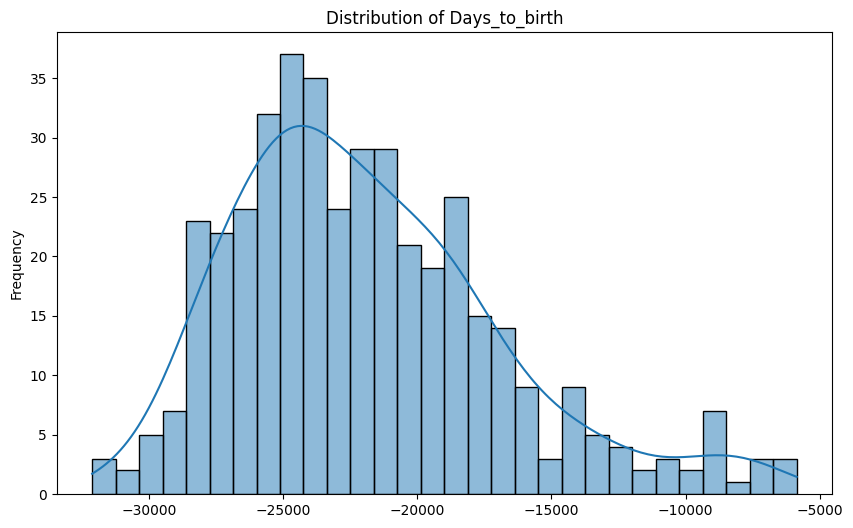

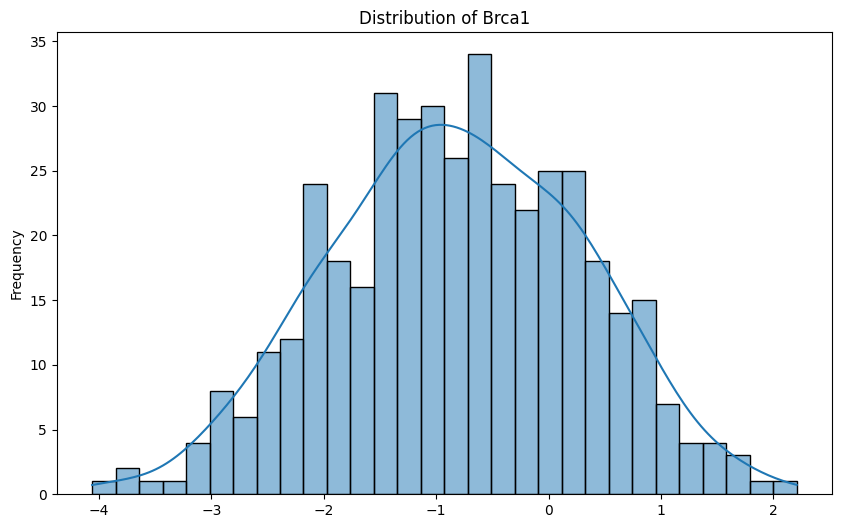

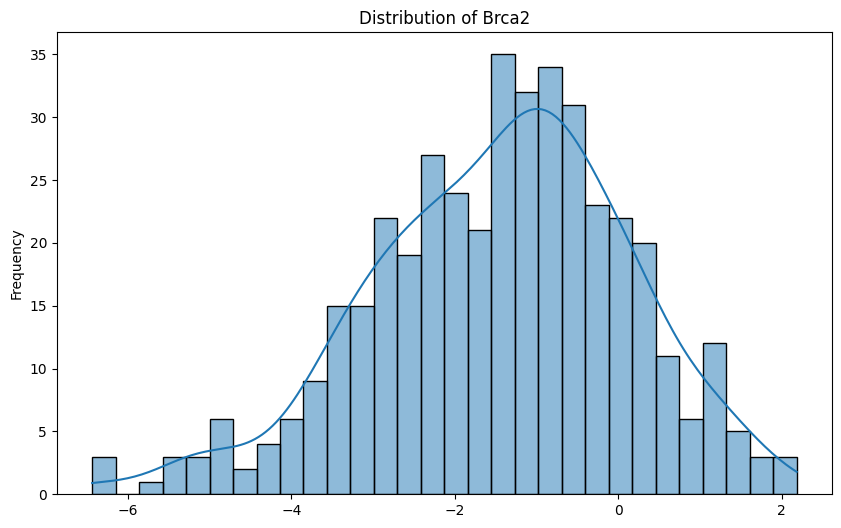

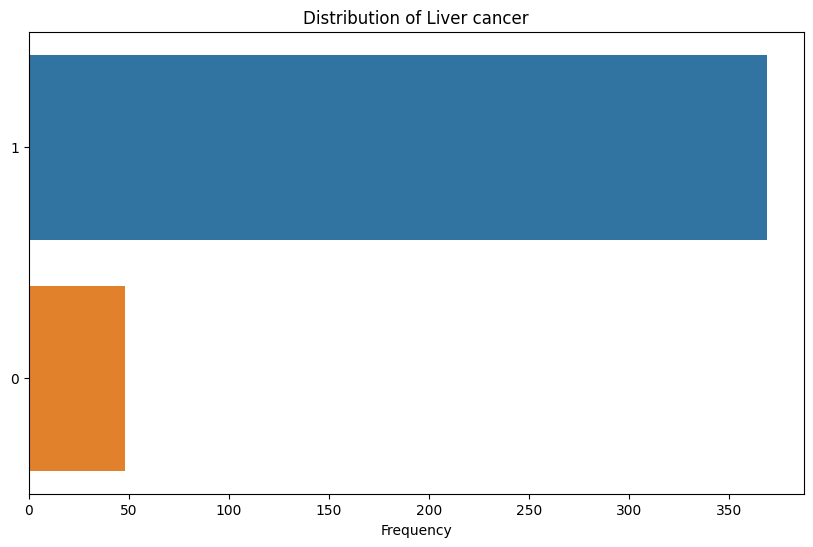

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

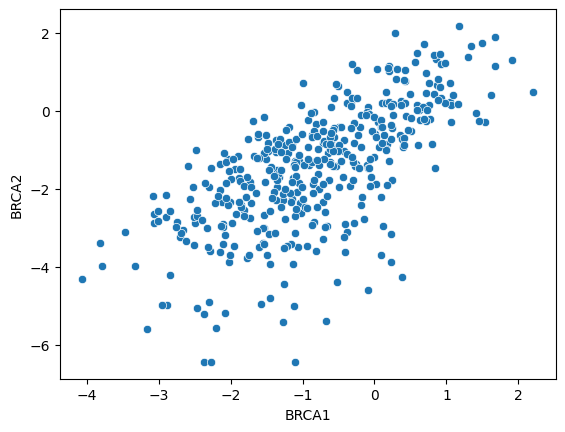

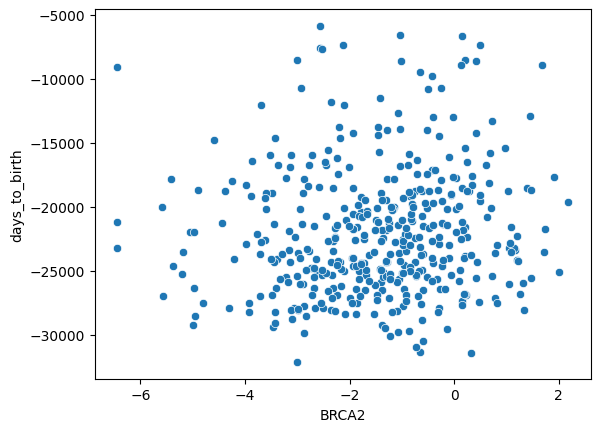

In [26]:
sns.scatterplot(data=merged_data, x='BRCA1', y='BRCA2')
plt.show()
sns.scatterplot(data=merged_data, x='BRCA2', y=condition_col)
plt.show()

In [27]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,FBXL13,FBXL12,FBXL15,CYP27B1,FBXL17,FBXL16,FAM169A,FAM116B,FAM116A,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Liver Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2Y-A9GS-01,58,-0.473756,-0.286507,0.174327,-2.77279,-0.238871,1.092932,1.841549,-1.268532,0.08401,...,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388,1
TCGA-2Y-A9GT-01,51,-0.589756,-0.219807,0.862227,0.29661,-0.026671,-3.335868,-0.343451,-0.979732,-0.51359,...,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188,1
TCGA-2Y-A9GU-01,55,-0.677256,0.265093,0.943527,-2.51589,0.186229,-1.267168,-3.087451,-0.671932,-1.76649,...,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088,1
TCGA-2Y-A9GV-01,54,-3.263356,-0.367907,0.520527,-1.87089,0.105729,-2.581268,0.808649,-1.104032,-0.96539,...,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688,1
TCGA-2Y-A9GW-01,64,-3.263356,0.017593,0.983427,2.54091,0.362329,-1.200068,-0.195351,-0.205932,-0.48299,...,1.082783,0.362567,-1.28139,-1.118377,-0.624886,0.903873,1.857205,-0.228533,0.692988,1


In [28]:
import pandas as pd
from sparse_lmm import VariableSelection

# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

d:\temp\temp\ipykernel_18712\2284219672.py:12: RuntimeWarning: invalid value encountered in true_divide
  X = (X - mean) / std
D:\Anaconda3\lib\site-packages\sparse_lmm\helpingMethods.py:49: RuntimeWarning: invalid value encountered in true_divide
  ts = beta / np.sqrt(var * sigma)
D:\Anaconda3\lib\site-packages\sparse_lmm\VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.1440847728262447


In [29]:
var_select = VariableSelection()

# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()

In [30]:
gene_result = []
condition_result = []

# Extract information related to the regressors
for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values):
    if gene in var.lower():
        gene_result.append((var, coef, np.exp(-nlogp)))
    if condition == var.lower():
        condition_result.append((var, coef, np.exp(-nlogp)))

regression_report = "Regression Results:\n\n"
regression_report += f"For {gene}:\n"
for variable_name, coefficient, p_value in gene_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

regression_report += f"\nFor {condition}:\n"
for variable_name, coefficient, p_value in condition_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(regression_report)

Regression Results:

For brca:
BRCA1: Coefficient = -0.03489284545307671, p-value = 0.013406301444777401
BRCA2: Coefficient = -0.015403173645668004, p-value = 0.4383919957978121

For age:
age: Coefficient = 0.008450485021422552, p-value = 0.35536379956245906



In [31]:
hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between BRCA gene and Liver Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the BRCA gene and Liver Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the BRCA gene and Liver Cancer when considering the influence of age.




In [33]:
threshold = 0.1
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n\n"

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

for variable_name, coefficient, p_value in gene_result + condition_result:
    interpretation_coefficient_report += interpret_coefficient(variable_name, coefficient, p_value, threshold)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: BRCA1
Coefficient is negative, and it is statistically significant (p-value < 0.1).

Variable: BRCA2
Coefficient is negative, and it is not statistically significant (p-value >= 0.1).

Variable: age
Coefficient is positive, and it is not statistically significant (p-value >= 0.1).




In [34]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {variable_name} gene and {trait} when considering the influence of {condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {variable_name} and {trait} when considering the influence of {condition}.\n\n"

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"

for variable_name, coefficient, p_value in gene_result:
    confirmation = confirm_hypothesis(coefficient, p_value, variable_name, threshold)
    hypothesis_confirmation_report += f"Variable: {variable_name}\n"
    hypothesis_confirmation_report += f"Conclusion: {confirmation}\n\n"

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: BRCA1
Conclusion: H1 is confirmed: There is an association between the expression of the BRCA1 and Liver Cancer when considering the influence of age.



Variable: BRCA2
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the BRCA2 gene and Liver Cancer when considering the influence of age.


